Nama : Sausan<br>
Grup : DS2

Link: https://colab.research.google.com/drive/1oyycvvb9ombE6waxRs6sAd0eE-PE4o0X?usp=sharing

##Day 6

Jumat, 06 Oktober 2023

#Superstore


In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#koneksi dari COLAB ke Gdrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#load data to colab
path= '/content/drive/MyDrive/DataSource/Sample - Superstore.xlsx'

load_data_ss=pd.read_excel(path)

#membuat data frame
df=pd.DataFrame(load_data_ss)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [9]:
df['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

## Perusahaan ingin mengetahui komposisi sales berdasarkan segment

In [10]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [11]:
import plotly.express as px

In [12]:
fig =px.pie(df, values='Sales', names='Segment')
fig.show()

Output: Segment yang paling banyak berkontribusi terhadap penjualan adalah Segment Consumer yaitu sebanyak 50,6%

In [13]:
import plotly.graph_objects as go

labels = df['Segment']
values = df['Sales']

#use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [14]:
fig = px.pie(df, values='Sales', names='Segment', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

##Perusahaan ingin mengetahui volume belanja setiap category berdasarkan nilai sales pada setiap segment penjualan

In [15]:
fig = px.bar(df, x="Sales", y="Category", color='Segment', orientation='h',
             hover_data=["Profit", "Discount"],
             height=400,
             title='Sales by Category & Segment')
fig.show()

##Visualisasikan jumlah sales berdasarkan Sub Category

In [16]:
df_sub_category = df.groupby('Sub-Category')['Sales'].sum()

fig = px.bar(
    df_sub_category,
    x=df_sub_category.index,
    y=df_sub_category.values,
    title='Jumlah Sales Berdasarkan Sub Category',
)

fig.show()

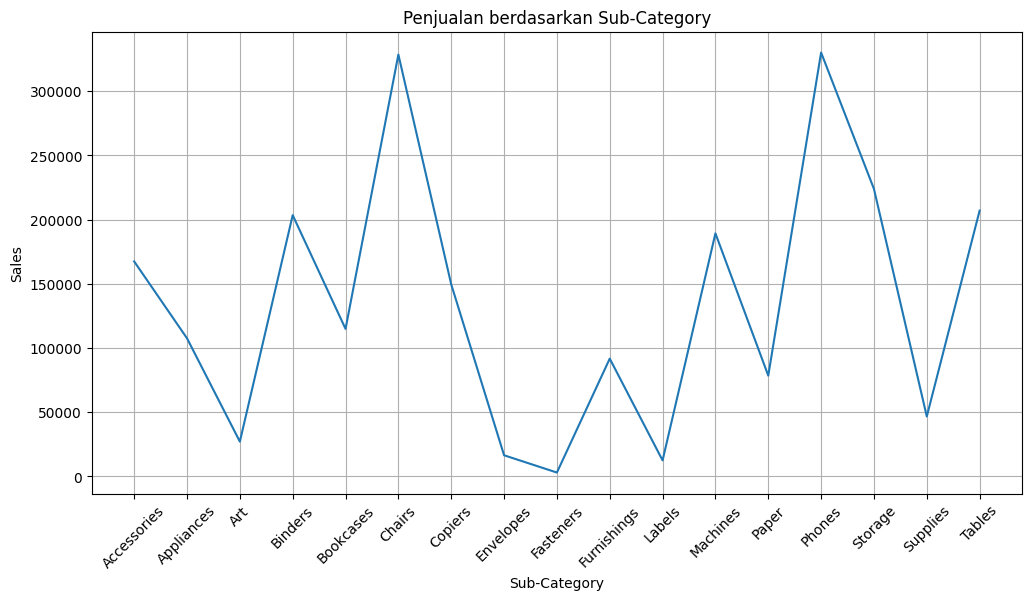

In [18]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sub_category_sales, x='Sub-Category', y='Sales')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.title('Penjualan berdasarkan Sub-Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##Visualisasikan hubungan antara 2 measure yaitu Sales dan Profit. Apakah sales yang besar akan menghasilkan profit yang besar?

In [19]:
fig = px.scatter(df, x='Sales', y='Profit', title='Hubungan Sales dan Profit')
fig.show()

In [20]:
fig = px.scatter(df, x='Profit', y='Sales', color='Profit', size='Sales', hover_data=['Product Name'])
fig.show()